In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


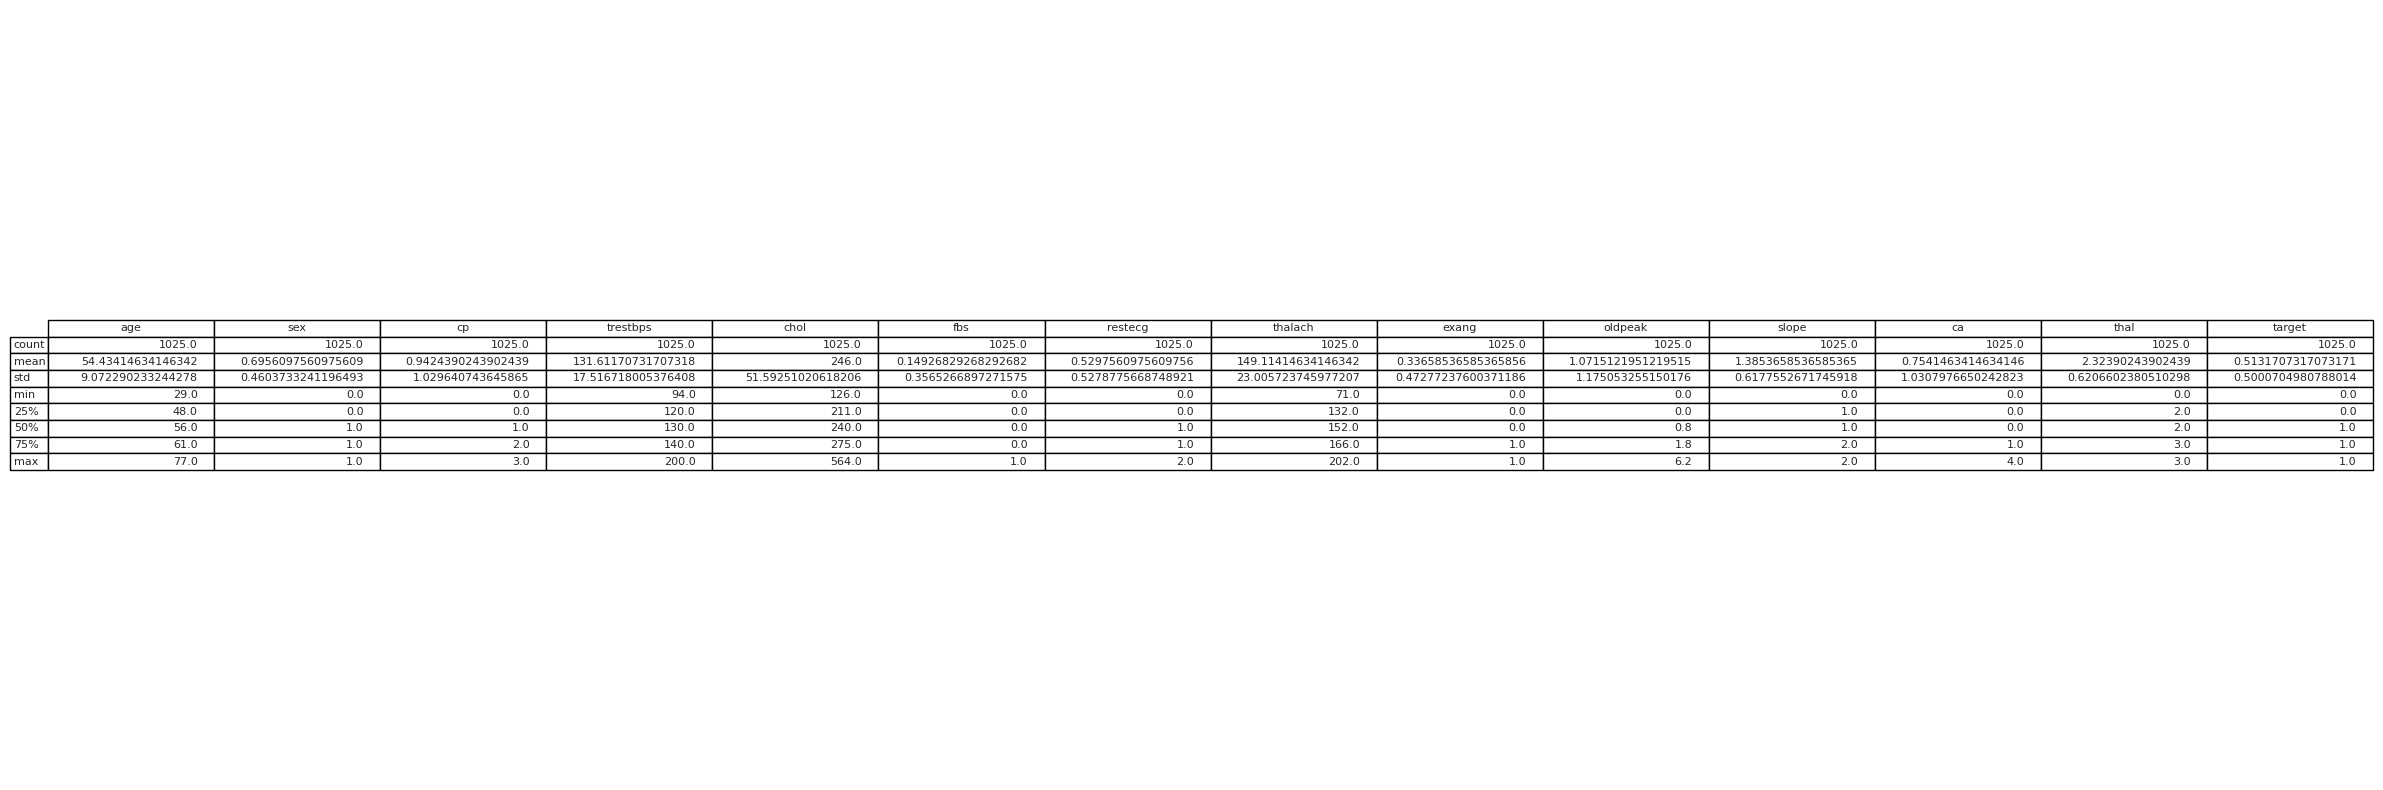

In [ ]:
describe_df = df.describe()

# Plotting describe() as an image
fig, ax = plt.subplots(figsize=(30, 10))  # Set figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=describe_df.values, colLabels=describe_df.columns, rowLabels=describe_df.index, loc='center')

plt.show()

In [ ]:
df.target.value_counts()


,count
target,
1,526
0,499


<ipython-input-127-64d5be856ef3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="bwr")


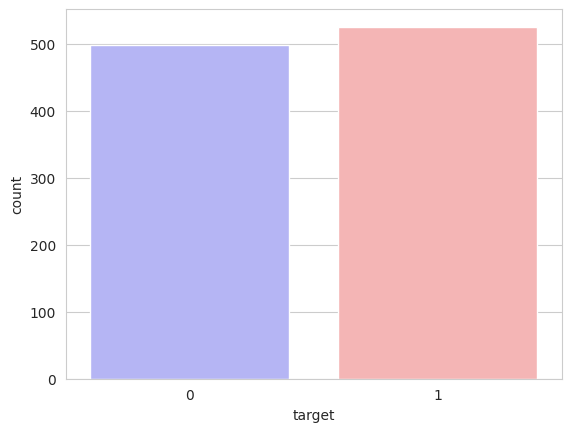

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


<ipython-input-129-ff4eb41656a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="mako_r")


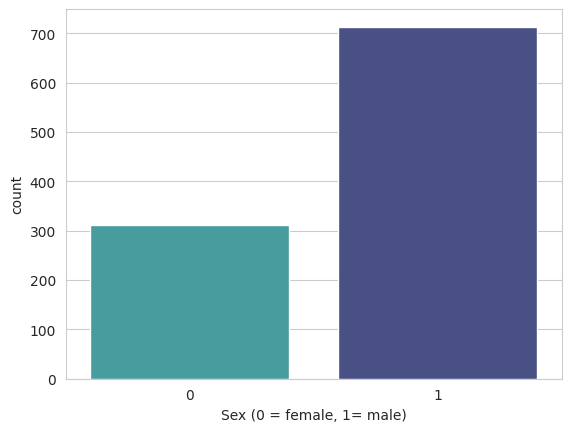

In [ ]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [ ]:
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


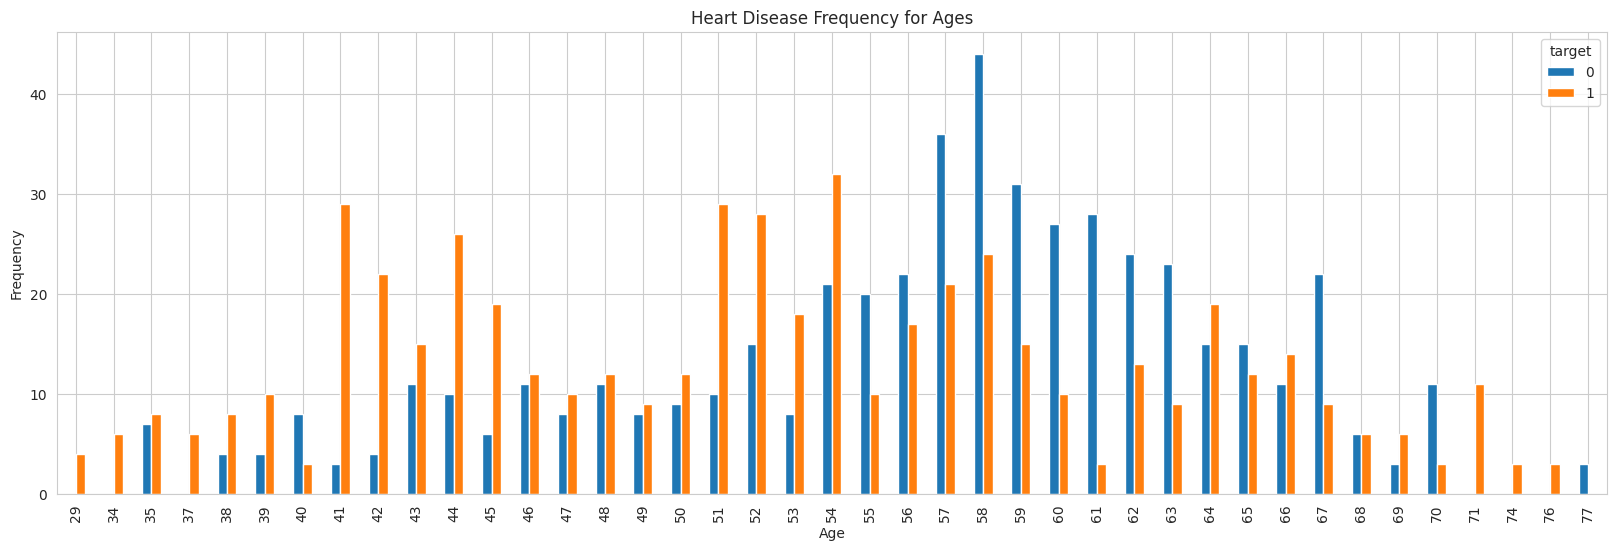

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

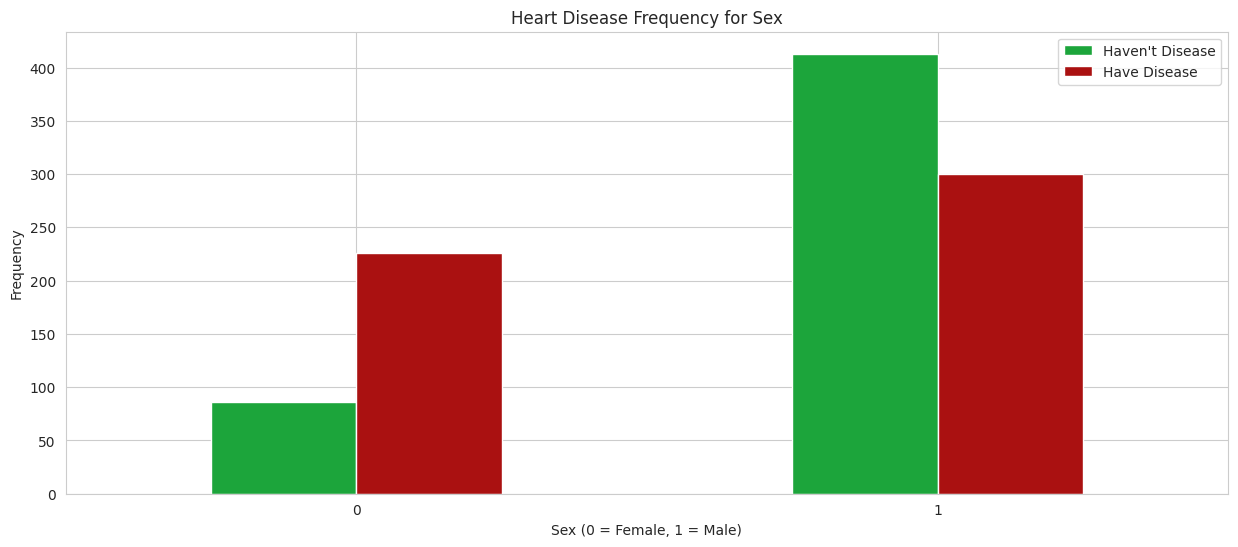

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

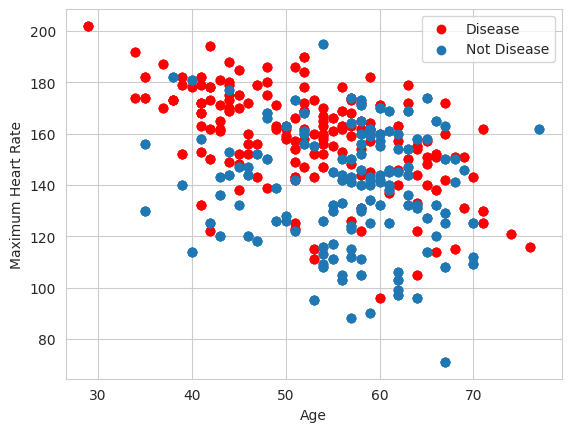

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

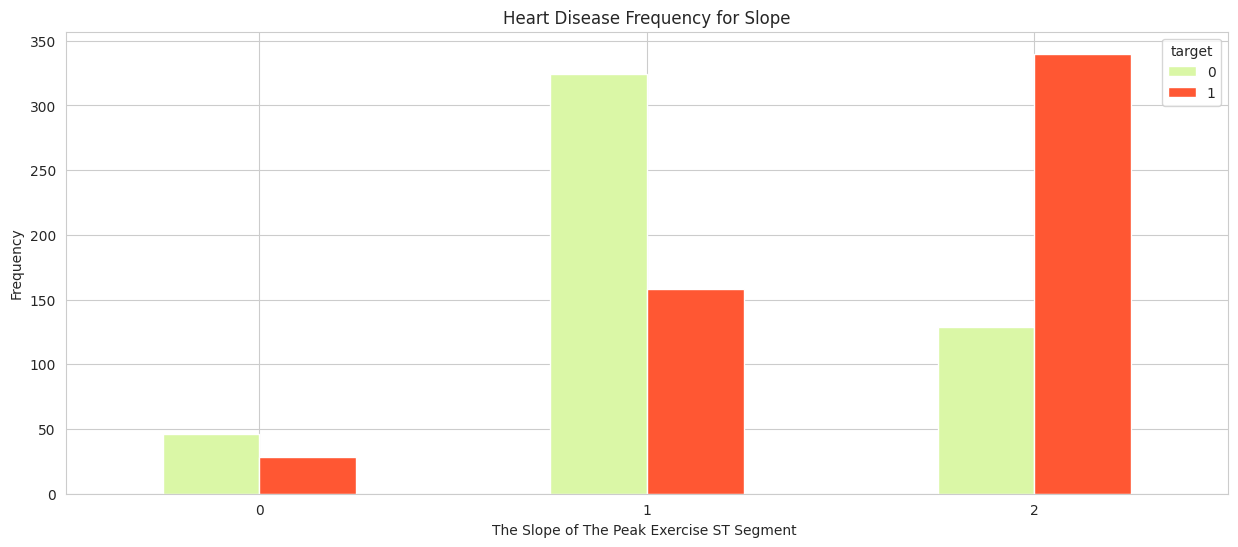

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

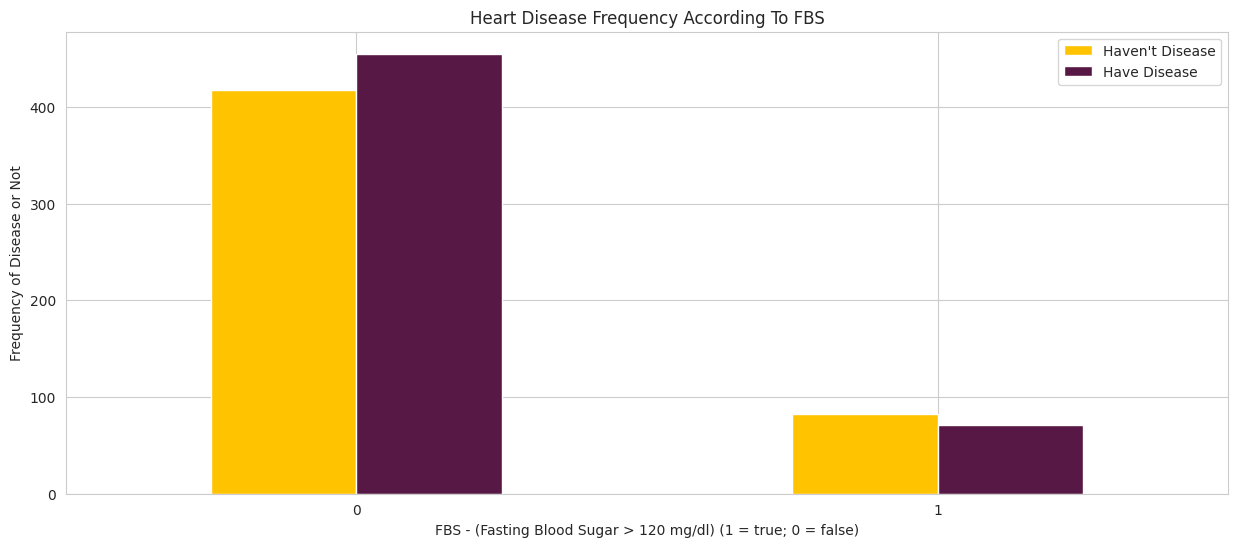

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

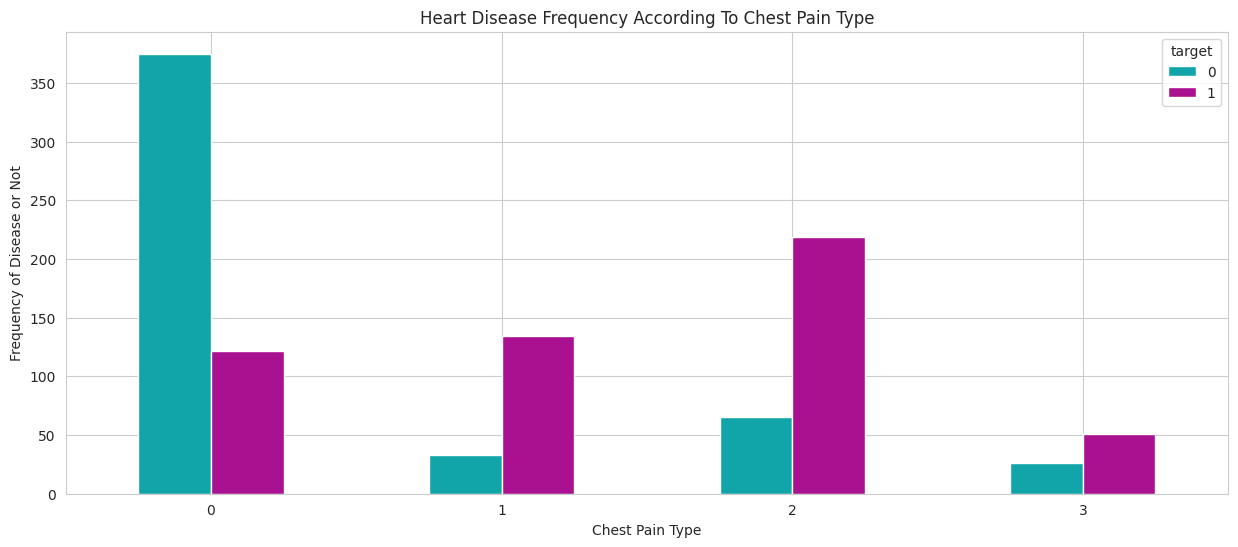

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,False,False,False,False,False,False,True,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,False,False,False,False,False,True,True,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,False,False,False,False,False,False,True,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
df_boolean_columns = df.select_dtypes(include=['bool']).columns
df[df_boolean_columns] = df[df_boolean_columns].astype(int)

In [ ]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
len(x_train)


21

Let's say weight = 0.01 and bias = 0.0

# Logistic Regression

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 72.68%


**Our model works with ~73% accuracy**

# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 95.12%


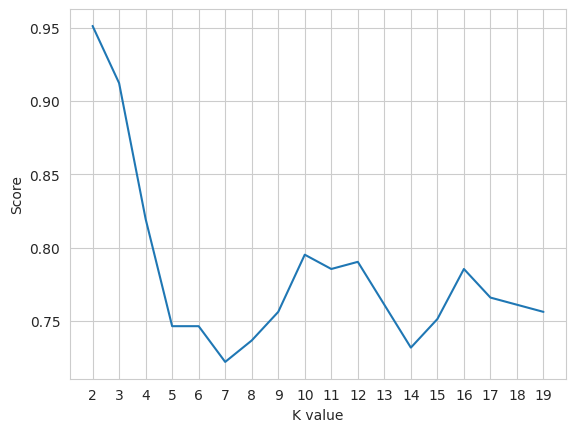

Maximum KNN Score is 95.12%


In [ ]:
scoreList = []
for i in range(2,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))

plt.plot(range(2,20), scoreList)
plt.xticks(np.arange(2,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# Support Vector Machine (SVM) Algorithm

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1, probability=True)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 74.63%


#Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 88.29%


#Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


#Random Forest Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%


#Comparing models

<ipython-input-155-dc0f4bfa96e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


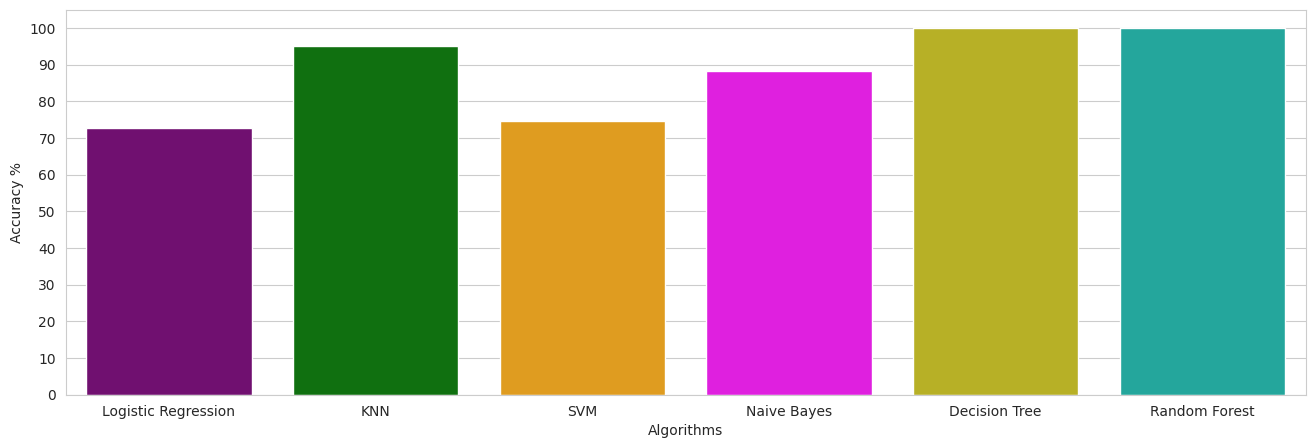

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,110,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()




**We rule out KNN, Decistion tree and Random forest because they are prone to overfitting so therefore are not useful on this particular dataset.**



#Visualizations

##Confusion Matrix

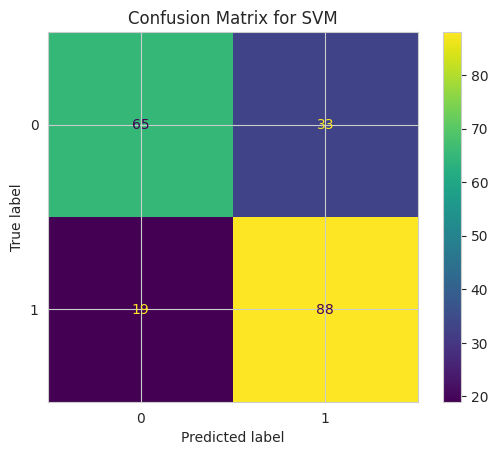

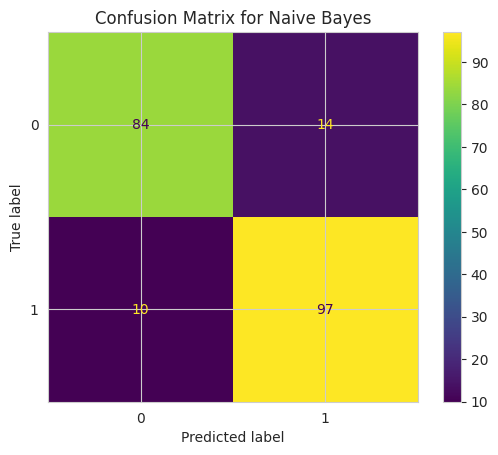

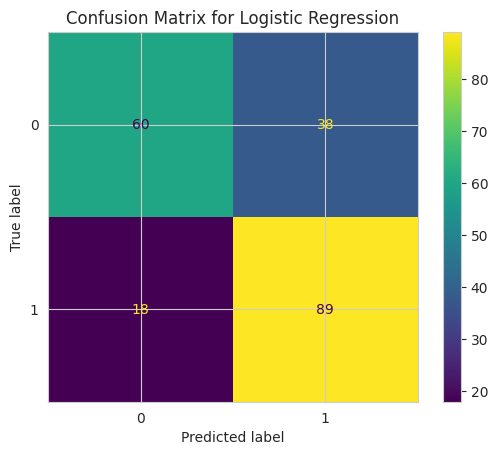

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test is your true labels and y_pred are predictions from each model
models = {'SVM': svm, 'Naive Bayes': nb, 'Logistic Regression': lr}
for model_name, model in models.items():
    y_pred = model.predict(x_test.T)
    cm = confusion_matrix(y_test.T, y_pred.T)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

##Report

```
`# This is formatted as code`
```



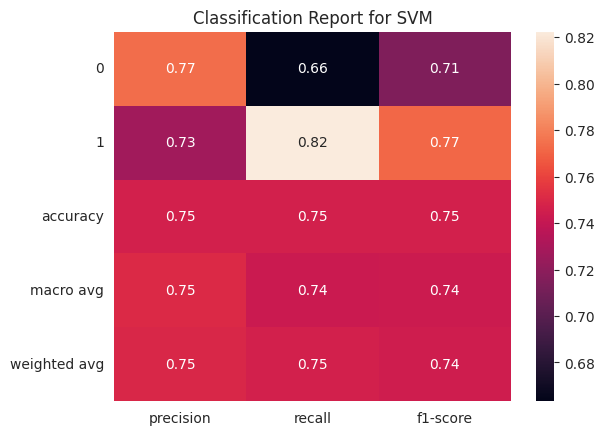

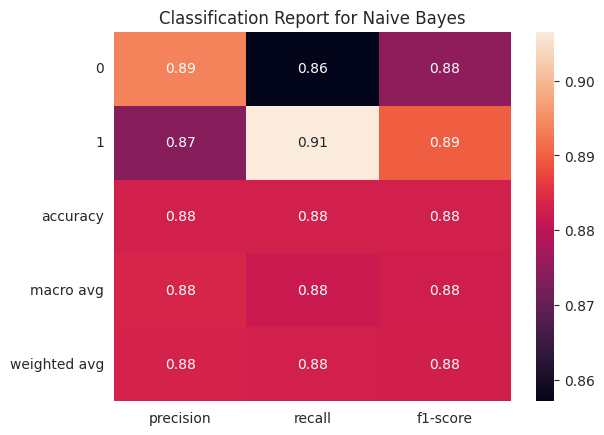

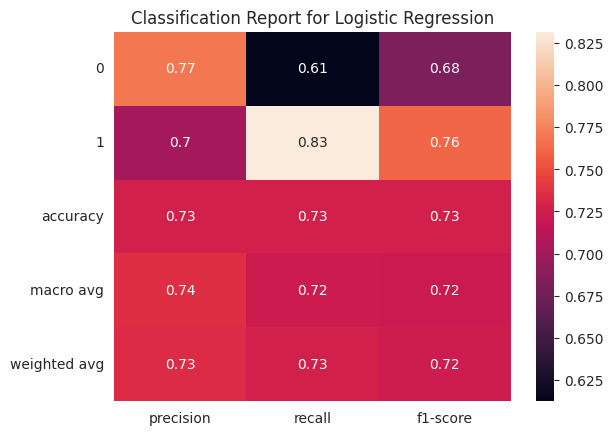

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

for model_name, model in models.items():
    y_pred = model.predict(x_test.T)
    report = classification_report(y_test.T, y_pred.T, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
    plt.title(f'Classification Report for {model_name}')
    plt.show()


##Precision recall curve

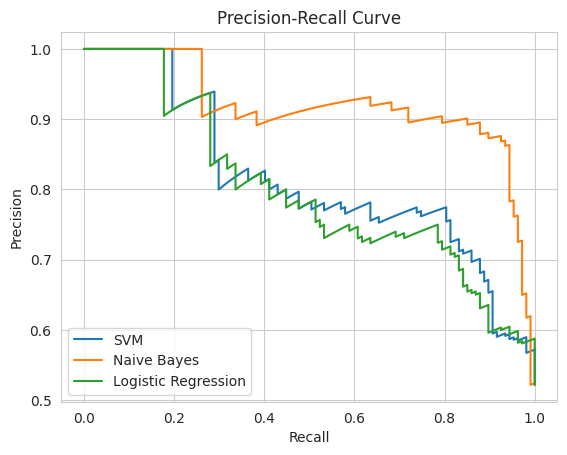

In [ ]:
from sklearn.metrics import precision_recall_curve

for model_name, model in models.items():
    y_prob = model.predict_proba(x_test.T)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test.T, y_prob.T)
    plt.plot(recall, precision, label=f'{model_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


##ROC

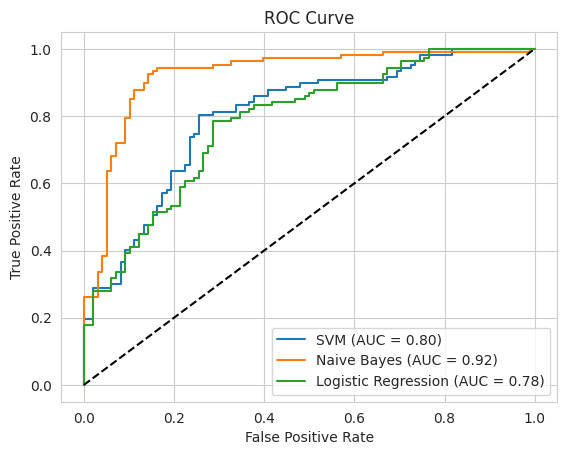

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay,roc_auc_score

# Assuming you have probabilities from each classifier's predict_proba method
for model_name, model in models.items():
    y_prob = model.predict_proba(x_test.T)[:, 1]
    fpr, tpr, _ = roc_curve(y_test.T, y_prob.T)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test.T, y_prob.T):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
